# GBSV Minichallenge Kanada

In [29]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import decimate, resample_poly

# Day 1
## Nyquist-Shannon Sampling Theorem
### Problemstellung
Der Sankt Lorenz Strom ist ein Fluss in Kanada. Er wird von den grossen Seen gespeist und fliesst in den Atlantik. In Kanada spielt der St.-Lawrence-Strom eine entscheidende Rolle für Schifffahrt, Energie und Ökosysteme. Für Hafenbehörden ist es wichtig, den Wasserstand kontinuierlich zu überwachen, da er durch Gezeiten, saisonale Effekte und Wetterbedingungen schwankt. Wir haben stündliche Daten des Wasserstands von einer Messstation in Montreal, welche wir analysieren wollen. Dadurch sollen die Wasserstände besser vorhergesagt werden können und so ein auf Grund laufen der Schiffe verhindert werden.

Quelle der Daten: https://www.isdm-gdsi.gc.ca/isdm-gdsi/twl-mne/inventory-inventaire/sd-ds-eng.asp?no=15540&user=isdm-gdsi&region=MEDS

In [26]:
# Einlesen der CSV-Datei
water = pd.read_csv(
    "data/st_lawrence_water.csv",
    skiprows=8, 
    usecols=[0, 1],                # nur die ersten beiden Spalten laden
    names=["Observed_date", "Sealevel"],    # Spaltennamen setzen
    parse_dates=["Observed_date"],      # Datum parsen
    encoding="latin1"
)

print(water.head())

        Observed_date  Sealevel
0 2015-01-01 00:00:00      0.32
1 2015-01-01 01:00:00      0.32
2 2015-01-01 02:00:00      0.33
3 2015-01-01 03:00:00      0.33
4 2015-01-01 04:00:00      0.33


Wir haben ein stündlich gemessenes Signal des Wasserstands des St.-Lawrence-Stroms von einer Messstation in Montreal. Das Signal enthält eine Periodische Komponente, welche durch die Jahreszeit verursacht wird. Zudem können auch die Gezeiten den Wasserstand beeinflussen, diese sind zwar abgeschwächt, aber dennoch möglicherweise vorhanden.

(-0.29, 3.29)

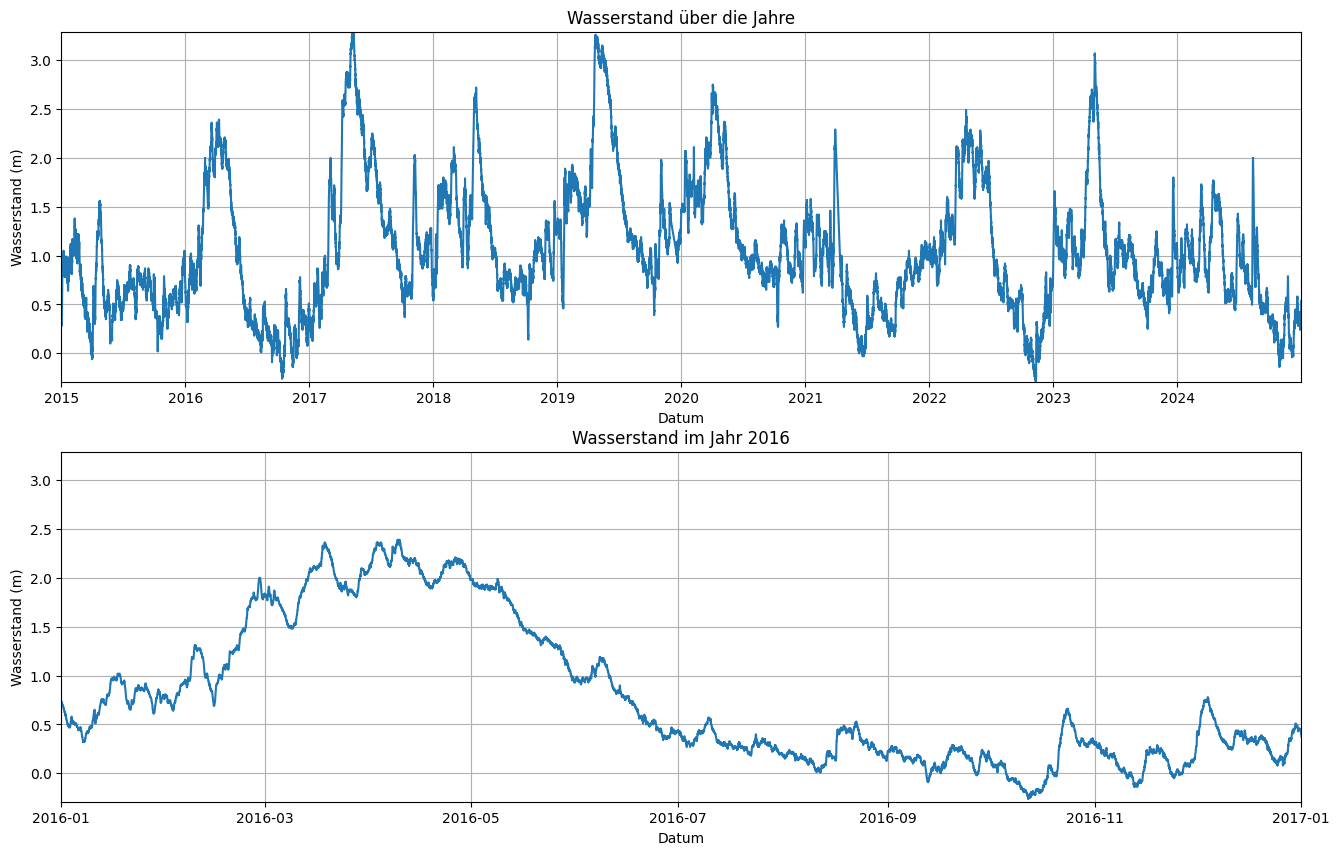

In [27]:
# Plotten der Daten einmal über die ganzen Jahre und für ein Jahr
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(water["Observed_date"], water["Sealevel"])
plt.title("Wasserstand über die Jahre")
plt.xlabel("Datum")
plt.ylabel("Wasserstand (m)")
plt.grid()
plt.xlim([water["Observed_date"].min(), water["Observed_date"].max()])
plt.ylim([water["Sealevel"].min(), water["Sealevel"].max()])
plt.subplot(2, 1, 2)
plt.plot(water["Observed_date"], water["Sealevel"])
plt.title("Wasserstand im Jahr 2016")
plt.xlabel("Datum")
plt.ylabel("Wasserstand (m)")
plt.grid()
plt.xlim([pd.Timestamp("2016-01-01"), pd.Timestamp("2017-01-01")])
plt.ylim([water["Sealevel"].min(), water["Sealevel"].max()])

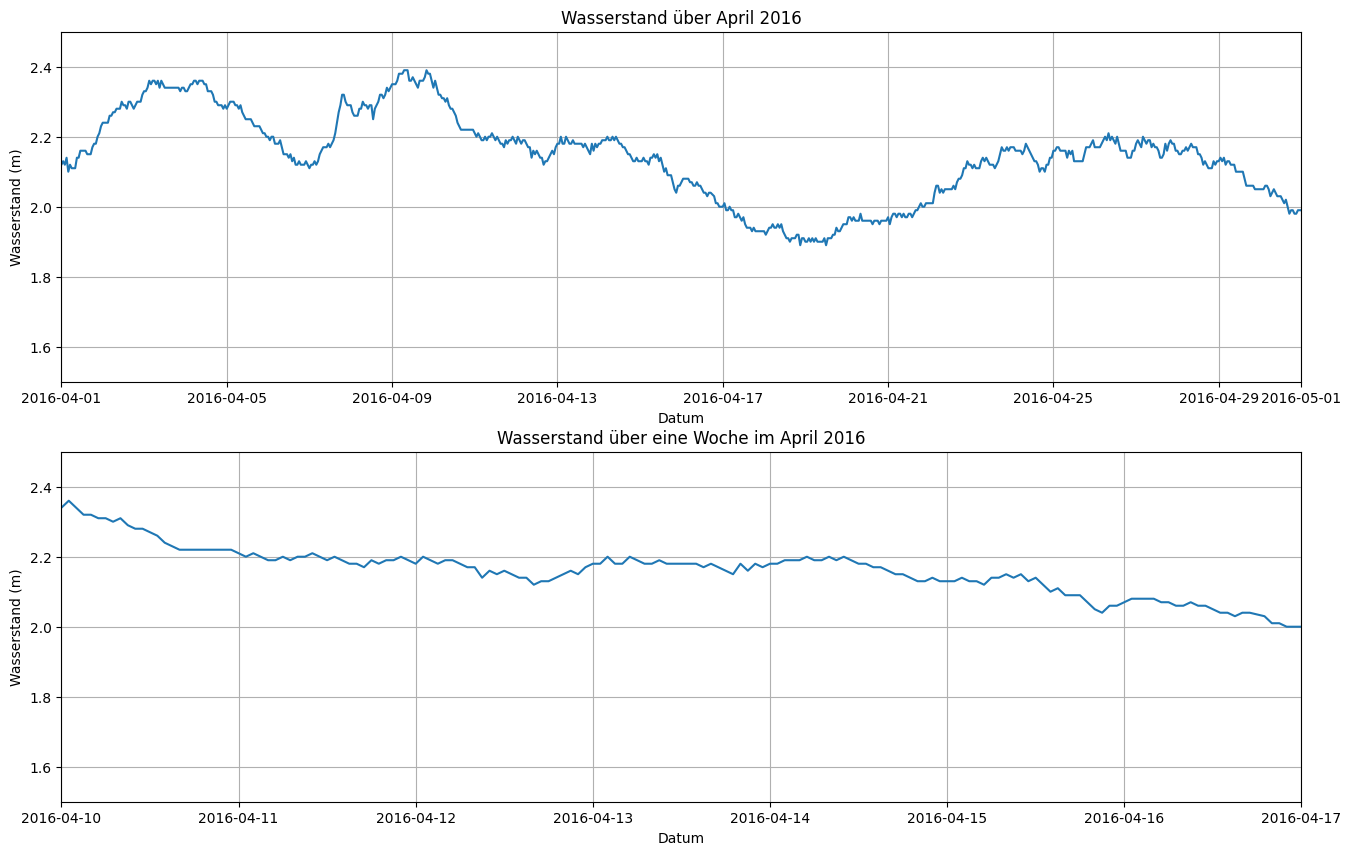

In [28]:
# # Plotten der Daten einmal über einen Monat und eine Woche
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(water["Observed_date"], water["Sealevel"])
plt.title("Wasserstand über April 2016")
plt.xlabel("Datum")
plt.ylabel("Wasserstand (m)")
plt.grid()
plt.xlim([pd.Timestamp("2016-04-01"), pd.Timestamp("2016-05-01")])
plt.ylim([1.5, 2.5])
plt.subplot(2, 1, 2)
plt.plot(water["Observed_date"], water["Sealevel"])
plt.title("Wasserstand über eine Woche im April 2016")
plt.xlabel("Datum")
plt.ylabel("Wasserstand (m)")
plt.grid()
plt.xlim([pd.Timestamp("2016-04-10"), pd.Timestamp("2016-04-17")])
plt.ylim([1.5, 2.5])
plt.show()


### Niquist-Rate und Niquist-Frequenz
Die Maximal relevante Frequenz, welche wir Beobachten wollen, ist die Frequenz der Gezeiten. Diese beträgt ca. 2 Zyklen pro Tag (2 mal Hochwasser und 2 mal Niedrigwasser pro Tag). Daraus ergibt sich eine maximale Frequenz von 2/24 = 1/12 Hz = 0.0833 Hz.
Gemäss dem Nyquist-Shannon Sampling Theorem muss die Rate mindestens doppelt so hoch sein, wie die maximale Frequenz, also mindestens 0.1666 Hz. Dies entspricht einer Abtastung alle 6 Stunden, was in unserem Fall mit einer stündlichen Erhebung der Daten gut erfüllt ist.

Zusammendassend bekommen wir eine **Nyquist-Rate von 0.1666 Hz** und eine **Nyquist-Frequenz von 0.0833 Hz**.

### Warum ist das wichtig?  
Wenn wir die Daten zu selten aufnehmen, können wir die hohen Frequenzen nicht mehr korrekt abbilden. Dies führt zu einem Phänomen, welches Aliasing genannt wird. Dabei werden hohe Frequenzen als tiefere Frequenzen interpretiert, was zu einer Verzerrung des Signals führt. In unserem Fall könnte dies bedeuten, dass änderungen im Wasserstand, welche durch die Gezeiten verursacht werden, nicht korrekt erkannt werden. Beispielsweise könnte die Messung täglich nur während der Flutzeit erfolgen. Dadurch würden die Gezeiten nicht erkannt werden und es könnte zu falschen Vorhersagen des Wasserstands kommen, was für die Schifffahrt gefährlich sein kann. Mit der stündlichen Messung können wir jedoch die auswirkungen der Gezeiten und andere schnelle Änderungen im Wasserstand gut erfassen.

## Day 2
### Nyquist-Demonstration mit St.-Lawrence Wasserstandsdaten
Für das gegebene stündliche Wasserstandssignal soll die Nyquist-Rate/Frequenz gezeigt werden, die höchste relevante Frequenz per FFT geschätzt werden und Aliasing bei zu grobem Sampling gezeigt werden.